In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/amazon (1).csv')

In [ ]:
df.sample()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
841,B084BR3QX8,LAPSTER Accessories Power Cable Cord 2 Pin Lap...,Computers&Accessories|Accessories&Peripherals|...,₹149,₹999,85%,3.5,"2,523",Compatable with Philiphs tape recorders and Em...,"AGI4CCISF6KU62HQAT2VM4GNNNJA,AFRVEW4OKSGZ2FNKM...","vinu,Goutam Banerjee,Rajeesh P,Sheeja Mol,Suma...","RTD1L3LGGMBG3,R1C6Z9AXP9ICQM,R3IAQHMHSD92O6,R1...","very good product,The replaced item is fine an...","good product value for money,,Good product,Wor...",https://m.media-amazon.com/images/I/41Cdc4mU7R...,https://www.amazon.in/LS-LAPSTER-Accessories-A...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           932 non-null    object 
 1   product_name         932 non-null    object 
 2   category             932 non-null    object 
 3   discounted_price     932 non-null    object 
 4   actual_price         932 non-null    object 
 5   discount_percentage  932 non-null    object 
 6   rating               932 non-null    float64
 7   rating_count         930 non-null    object 
 8   about_product        932 non-null    object 
 9   user_id              932 non-null    object 
 10  user_name            932 non-null    object 
 11  review_id            932 non-null    object 
 12  review_title         932 non-null    object 
 13  review_content       932 non-null    object 
 14  img_link             932 non-null    object 
 15  product_link         932 non-null    obj

In [ ]:
df['discounted_price']=df['discounted_price'].str.replace('₹','',regex=True)
df['discounted_price']=df['discounted_price'].str.replace(',','',regex=True)

In [ ]:
df['discounted_price']=df['discounted_price'].fillna(0).astype(float)

In [ ]:
df['actual_price']=df['actual_price'].str.replace('₹','',regex=True)
df['actual_price']=df['actual_price'].str.replace(',','',regex=True)

In [ ]:
df['actual_price']=df['actual_price'].fillna(0).astype(float)

In [ ]:
df['discount_percentage']=df['discount_percentage'].str.replace('%','',regex=True)
df['discount_percentage']=df['discount_percentage'].str.replace(',','',regex=True)

In [ ]:
df['discount_percentage']=df['discount_percentage'].fillna(0).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           932 non-null    object 
 1   product_name         932 non-null    object 
 2   category             932 non-null    object 
 3   discounted_price     932 non-null    float64
 4   actual_price         932 non-null    float64
 5   discount_percentage  932 non-null    float64
 6   rating               932 non-null    float64
 7   rating_count         930 non-null    object 
 8   about_product        932 non-null    object 
 9   user_id              932 non-null    object 
 10  user_name            932 non-null    object 
 11  review_id            932 non-null    object 
 12  review_title         932 non-null    object 
 13  review_content       932 non-null    object 
 14  img_link             932 non-null    object 
 15  product_link         932 non-null    obj

 1.What is the average rating for each product category

2. What are the top rating_count products by category

3.What is the distribution of discounted prices vs. actual prices?

 4. How does the average discount percentage vary across categories?

5. What are the most popular product names?

6. What are the most popular product keywords?

7. What are the most popular product reviews?

8. What is the correlation between discounted_price and rating?

9. What are the Top 5 categories based on the highest ratings?

10. Identify any potential areas for improvement or optimization based on the data analysis.


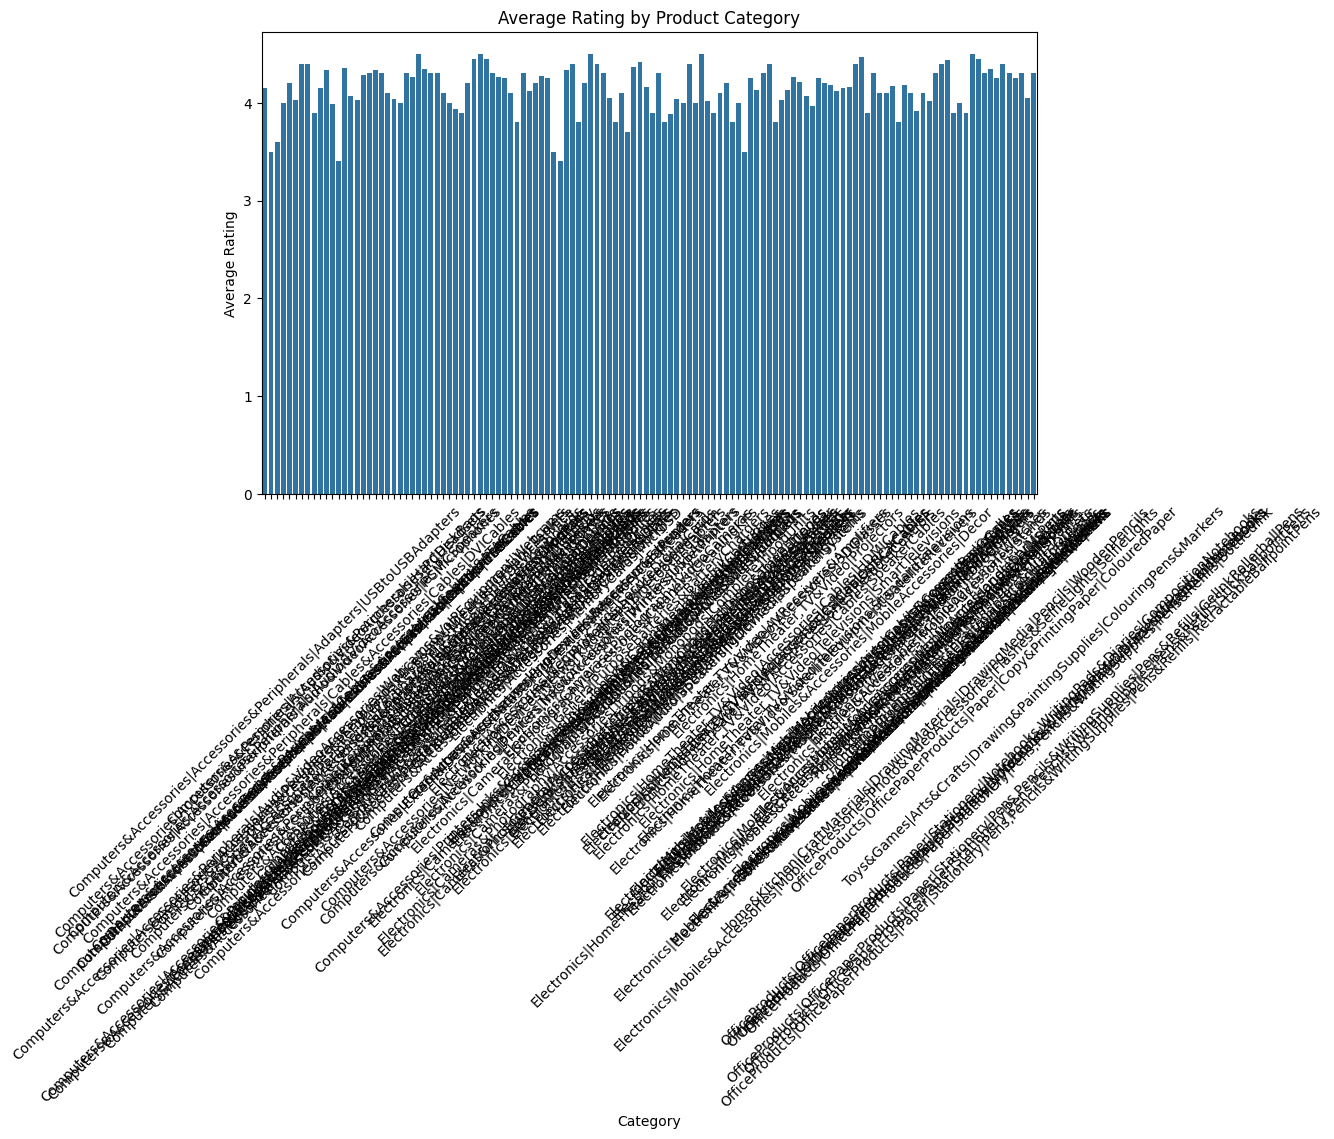

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average rating per category
avg_rating_per_category = df.groupby('category')['rating'].mean().reset_index()

# Plot the average rating for each category
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_per_category, x='category', y='rating')
plt.title('Average Rating by Product Category')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.show()



insights:

 average rating for each category is between 3 to 5

In [ ]:
# Sort the dataframe by category and rating_count in descending order
top_rating_count_per_category = df.sort_values(['category', 'rating_count'], ascending=[ True,False])

# Extract the top product by category
top_products_by_category = top_rating_count_per_category.groupby('category').head(1)[['category', 'product_name', 'rating_count']]

print(top_products_by_category)




                                              category  \
695  Computers&Accessories|Accessories&Peripherals|...   
906  Computers&Accessories|Accessories&Peripherals|...   
772  Computers&Accessories|Accessories&Peripherals|...   
844  Computers&Accessories|Accessories&Peripherals|...   
794  Computers&Accessories|Accessories&Peripherals|...   
..                                                 ...   
757  OfficeProducts|OfficePaperProducts|Paper|Stati...   
616  OfficeProducts|OfficePaperProducts|Paper|Stati...   
765  OfficeProducts|OfficePaperProducts|Paper|Stati...   
850  OfficeProducts|OfficePaperProducts|Paper|Stati...   
924  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                          product_name rating_count  
695  rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906  Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
772  HUMBLE Dynamic Lapel Collar Mic Voice Recordin...        2,804  
844  Zebronics Zeb Wond

insights:

in 'Toys&Games|Arts&Crafts|Drawing&PaintingSupplie... ' category 'Faber-Castell Connector Pen Set - Pack of 25' having highest rating count i.e 15,867 and in 'Computers&Accessories|Accessories&Peripherals' : 'Logitech C270 Digital HD Webcam with Widescree...' have highest rating counti.e  20,398

<ipython-input-18-dacdf30aad5c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['actual_price'], label='actual_Price', shade=True)
<ipython-input-18-dacdf30aad5c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['discounted_price'], label='Discounted Price', shade=True)


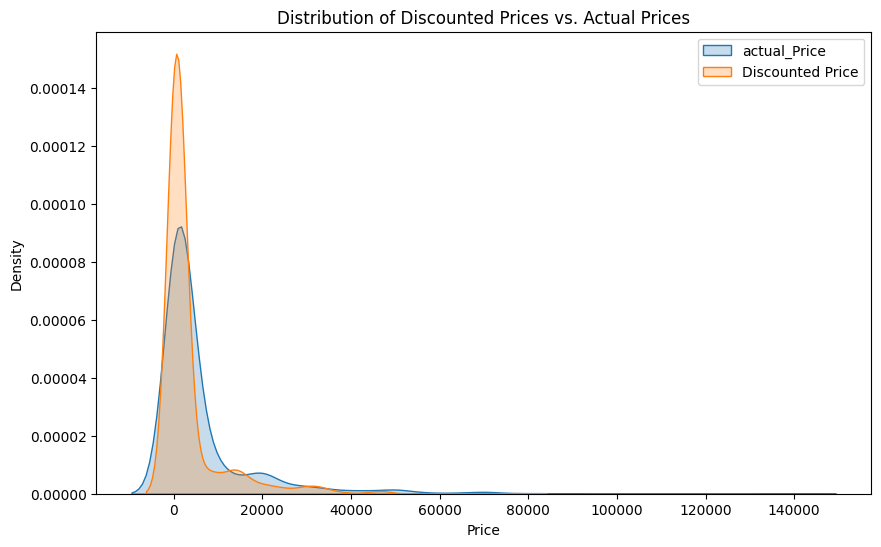

In [ ]:


# Plot the distribution of discounted vs. actual prices
plt.figure(figsize=(10, 6))
sns.kdeplot(df['actual_price'], label='actual_Price', shade=True)
sns.kdeplot(df['discounted_price'], label='Discounted Price', shade=True)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()


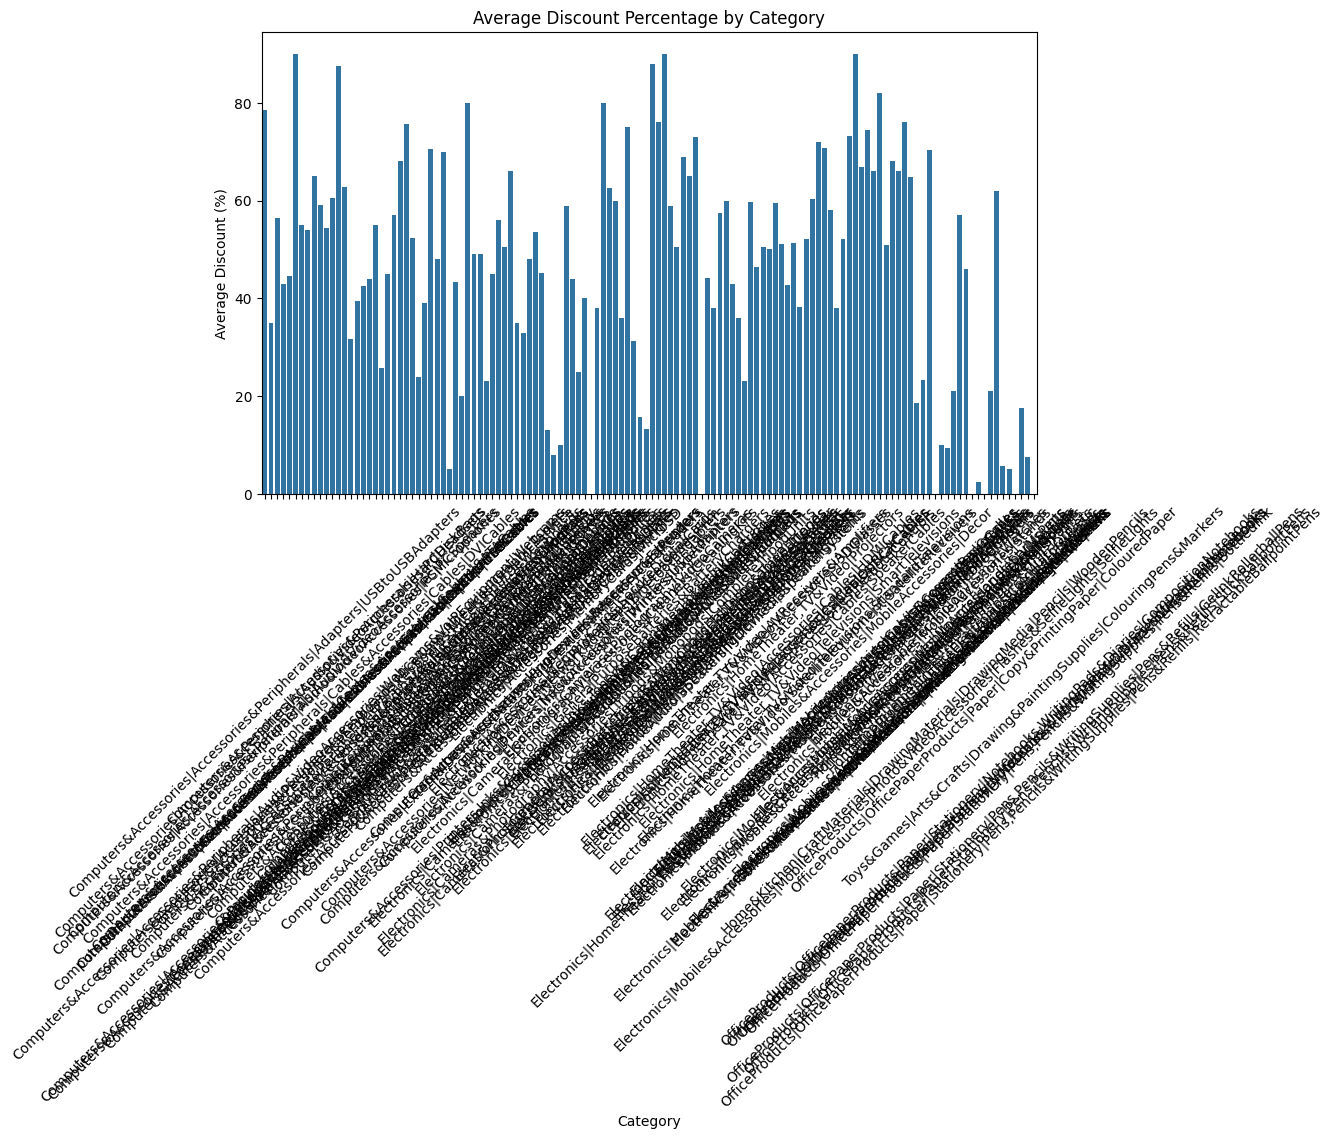

In [ ]:
# Calculate average discount percentage for each category
avg_discount_category = df.groupby('category')['discount_percentage'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_discount_category, x='category', y='discount_percentage')
plt.title('Average Discount Percentage by Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Discount (%)')
plt.show()


In [ ]:
# Sort products by rating_count
most_popular_products = df.sort_values('rating_count', ascending=False).head(10)

print(most_popular_products[['product_name', 'rating_count']])


                                          product_name rating_count
750       Eveready Red 1012 AAA Batteries - Pack of 10          989
32   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
151  Zoul USB Type C Fast Charging 3A Nylon Braided...          974
536  boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918  boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
691  TP-Link USB Bluetooth Adapter for PC, 5.0 Blue...       95,116
443  boAt Rugged v3 Extra Tough Unbreakable Braided...       94,364
628  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94,364
392  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...       94,364


insights:

'oAt Deuce USB 300 2 in 1 Type-C & Micro USB S' is most popular product having rating count 94,364

In [ ]:
from collections import Counter

# Tokenize product names and count keywords
keywords = ' '.join(df['product_name']).split()
keyword_counts = Counter(keywords)

# Get top 10 keywords
most_common_keywords = keyword_counts.most_common(10)

print(most_common_keywords)


[('with', 479), ('for', 405), ('USB', 298), ('|', 295), ('&', 287), ('Cable', 285), ('Charging', 200), ('Fast', 190), ('and', 187), ('C', 162)]


insights:

most commonly used keyword is 'with' used in almost 479 products

In [ ]:
# Sort by rating and rating_count
most_popular_reviews = df.sort_values(['rating', 'rating_count'], ascending=False).head(10)

print(most_popular_reviews[['review_title', 'review_content', 'rating']])


                                          review_title  \
174  Good,Superb quality,Good products  nice one,Wo...   
775  Very responsive and stylish mouse,Simply Aweso...   
324                                    Awesome Product   
459  Easy to install,Best screen guard and the easi...   
249  Product installation was excellent  but delive...   
468  Best For It’s Money!🔥,Nice quality, but comes ...   
820  Good product,Good quality,Good,Great mouse pad...   
137  Fantastic Ultra High Speed HDMI cable,Amazing ...   
447  Easy to install but a bit slippery,Very good p...   
571  Good,Good Product but Little expensive.,Happy ...   

                                        review_content  rating  
174  Product is good in quality. Working good with ...     5.0  
775  I really like this wireless mouse it has becam...     5.0  
324  Quick delivery.Awesome ProductPacking was good...     5.0  
459  It is easy to install at home. The kit has all...     4.7  
249  The delivery people were not ca

insights:

five rating are given by three customer

Correlation between discounted_price and rating: 0.10848357702261455


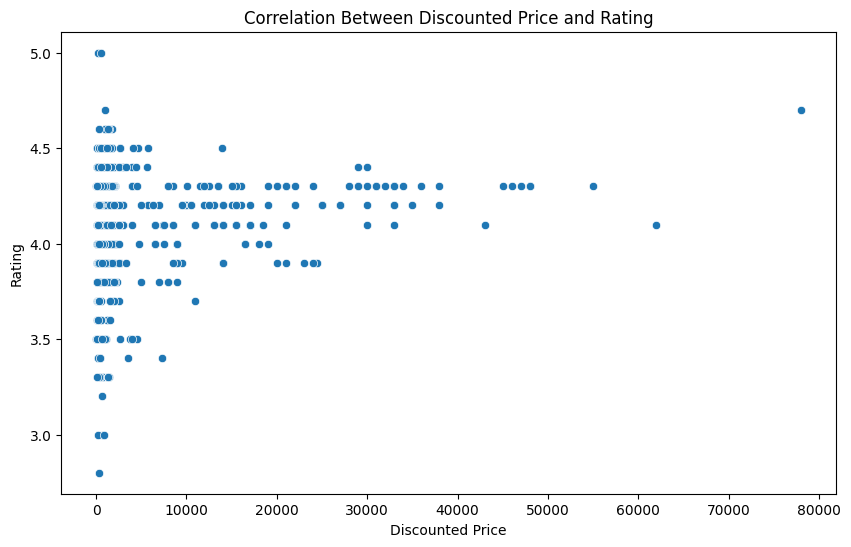

In [ ]:
# Calculate correlation
correlation = df['discounted_price'].corr(df['rating'])
print(f'Correlation between discounted_price and rating: {correlation}')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discounted_price', y='rating')
plt.title('Correlation Between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()


In [ ]:
# Calculate average rating per category
avg_rating_category = df.groupby('category')['rating'].mean().reset_index()

# Get the top 5 categories
top_categories = avg_rating_category.sort_values('rating', ascending=False).head(5)

print(top_categories)



                                              category  rating
71   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
53    Electronics|Cameras&Photography|Accessories|Film     4.5
35             Computers&Accessories|Components|Memory     4.5
25   Computers&Accessories|Accessories&Peripherals|...     4.5
115  OfficeProducts|OfficeElectronics|Calculators|B...     4.5


insights:

average rating per category is 4.5

In [ ]:
df2=pd.read_csv('/content/spotify.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [ ]:
df2.sample()

,Artist,Track Name,Popularity,Duration (ms),Track ID
338,Lil Uzi Vert,Money Longer,75,198944,0B8QzDH7YWih85V5SEMnyJ


1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.
Handle missing values and remove duplicate rows if necessary.

2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
using a countplot.

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

6.Among the top 5 most popular artists, which artist has the highest popularity on average?
Calculate and display the average popularity for each artist.

7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

9.Does the duration of tracks vary significantly across different artists?
Explore this visually using a box plot or violin plot.

10.How does the distribution of track popularity vary for different artists?
Visualize this using a swarm plot or a violin plot.

In [ ]:
print(df2.isnull().sum())

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [ ]:
df2['Duration (ms)'].fillna(df2['Duration (ms)'].median(), inplace=True)

<ipython-input-35-b001f67de592>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Duration (ms)'].fillna(df2['Duration (ms)'].median(), inplace=True)


In [ ]:
duplicates = df.duplicated().sum()  # This will return the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
if duplicates > 0:
    df2.drop_duplicates(inplace=True)
    print("Duplicates removed.")


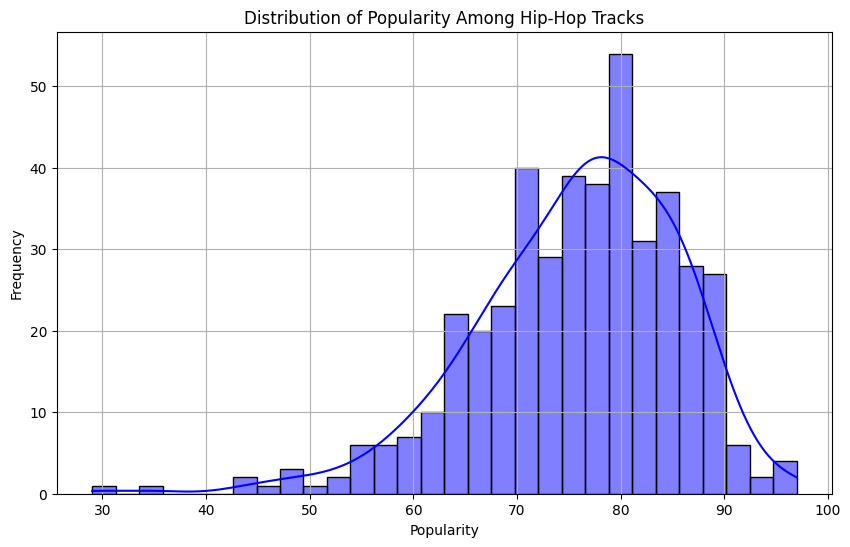

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe 'df' is already loaded and cleaned
# 1. Extract the 'Popularity' column (replace 'Popularity' with the actual column name if different)
popularity = df2['Popularity']

# 2. Plot the distribution of popularity using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(popularity, kde=True, bins=30, color='blue')  # kde=True adds the kernel density estimate curve
plt.title('Distribution of Popularity Among Hip-Hop Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


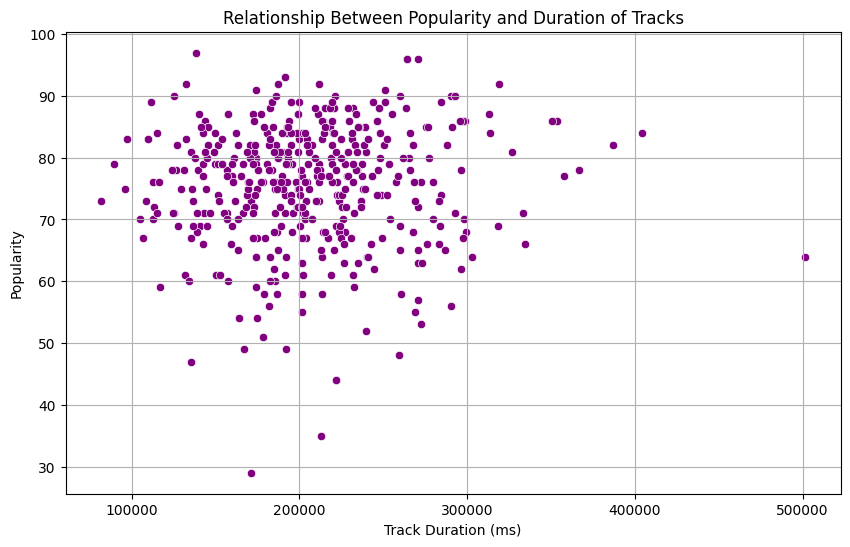

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe 'df' is already loaded and cleaned
# 1. Extract the 'Popularity' and 'Duration (ms)' columns
popularity = df2['Popularity']
duration = df2['Duration (ms)']

# 2. Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=duration, y=popularity, color='purple')

# Add titles and labels
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Track Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


insights:
track having duration of 150000 to 250000 have high popularity

<ipython-input-44-1e3c3fde72c1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Artist', palette='viridis')


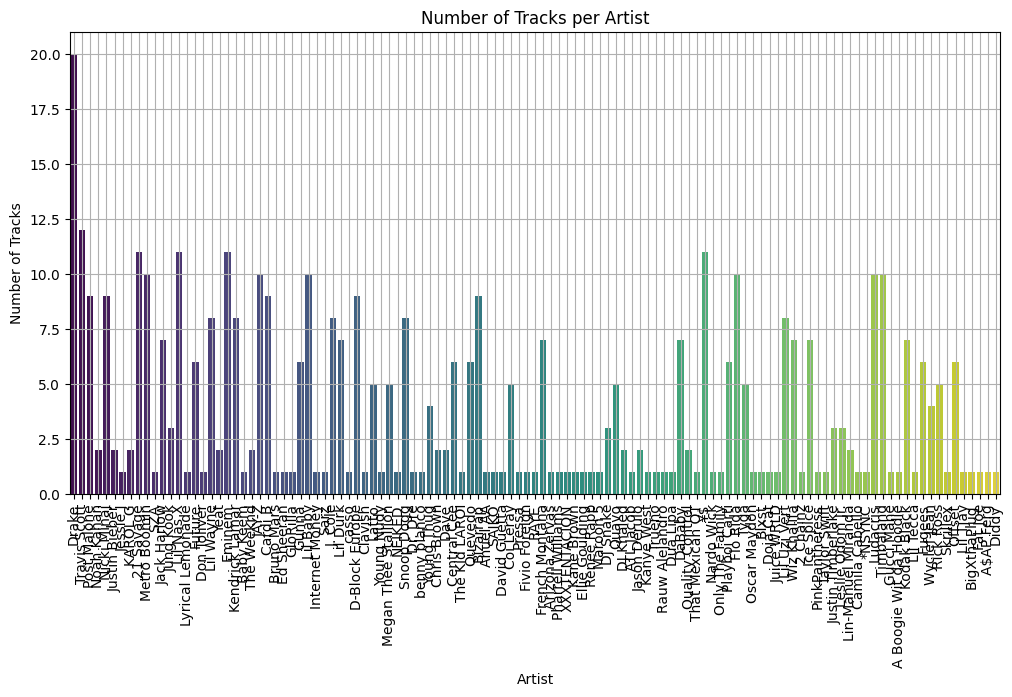

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe 'df' is already loaded and cleaned
# 1. Count the number of tracks for each artist
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Artist', palette='viridis')

# Add titles and labels
plt.title('Number of Tracks per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)  # Rotate the artist names for better readability
plt.grid(True)
plt.show()


insights:

drack having highest number of tracks i.e 20

In [ ]:
# Sorting the dataset by popularity in ascending order and selecting the top 5 least popular tracks
least_popular_tracks = df2.sort_values(by='Popularity').head(5)

# Display the track name and artist name for the top 5 least popular tracks
least_popular_tracks = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
435  French Montana                Splash Brothers          44
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


insights:

pressa's track is least popular name feat. Coi Leray having popularity 29

In [ ]:
# Sorting the dataset by popularity in descending order and selecting the top 5 most popular artists
top_5_artists = df2.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

# Display the artist name and average popularity for the top 5 artists
print(top_5_artists)


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


insights:

casso is most popular artist having popularity 92

In [ ]:
# Identify the top 5 artists by average popularity
top_5_artists = df2.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

# Find the most popular track for each of the top 5 artists
most_popular_tracks = df2[df2['Artist'].isin(top_5_artists.index)]  # Filter rows for top 5 artists
most_popular_tracks = most_popular_tracks.loc[most_popular_tracks.groupby('Artist')['Popularity'].idxmax()]

# Display the artist name and their most popular track
for index, row in most_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Most Popular Track: {row['Track Name']}, Popularity: {row['Popularity']}")


Artist: David Guetta, Most Popular Track: Baby Don't Hurt Me, Popularity: 87
Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti), Popularity: 93
Artist: Trueno, Most Popular Track: Mamichula - con Nicki Nicole, Popularity: 89
Artist: cassö, Most Popular Track: Prada, Popularity: 92
Artist: ¥$, Most Popular Track: CARNIVAL, Popularity: 96


insights:

artist ¥$ having  Most Popular Track CARNIVAL, Popularity is 96

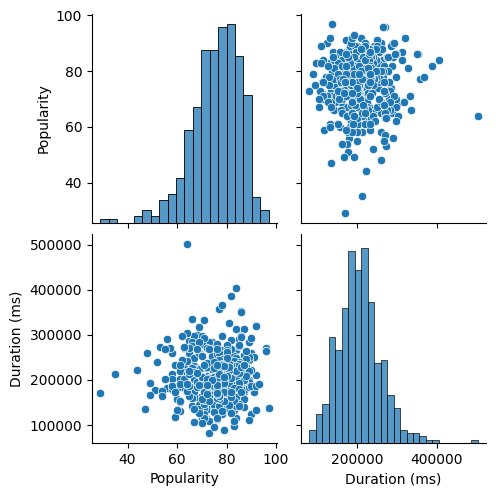

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns to visualize
numerical_columns = ['Popularity', 'Duration (ms)']

# Create a pair plot
sns.pairplot(df2[numerical_columns])

# Show the plot
plt.show()


In [61]:
import plotly.express as px

# Create the boxplot
fig = px.box(
    df2,
    x='Artist',
    y='Duration (ms)',
    title="Duration of Tracks Across Different Artists",
    labels={'Duration (ms)': 'Duration (ms)', 'Artist': 'Artist'},
    template='plotly'
)

# Update layout for better visibility of artist names
fig.update_layout(xaxis_tickangle=90, height=600, width=1000)

# Show the plot
fig.show()



insights:

dj khaled having longest duration of track

In [67]:
import plotly.express as px

# Create the swarm-like plot using strip plot functionality in Plotly
fig = px.strip(
    df2,
    x='Artist',
    y='Popularity',
    title="Track Popularity Distribution Across Different Artists",
    labels={'Artist': 'Artist', 'Popularity': 'Popularity'},
    width=1000,
    height=600
)

# Update layout for better visibility
fig.update_layout(
    xaxis={'tickangle': 90},  # Rotate artist names for better readability
    showlegend=False
)

# Show the plot
fig.show()


insights:

Artist jack harlow having highest popularity i.e 97